# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from HANKStickyModel import HANKStickyModelClass

In [2]:
# model = HANKStickyModelClass(name='test')
model = HANKStickyModelClass(name='baseline_2602', par = {'beta_mean': 0.9988,
                                                         'sigma_e': 0.36})

In [3]:
# model2 = HANKStickyModelClass(name='test')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value

In [4]:
# model.load()
model.find_ss(do_print=True)

find beta for market clearing
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [14.1 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [8.5 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [8.6 secs]
 [beta, sigma_e] = [  0.998800014883,   0.360000000000] -> [ss.clearing_Y =   0.000231505769, ss.clearing_MPC =  -0.003892680925] [8.7 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000005364] -> [ss.clearing_Y =   0.000231563740, ss.clearing_MPC =  -0.003893593267] [8.6 secs]
 [beta, sigma_e] = [  0.998870226555,   0.359526595375] -> [ss.clearing_Y =  -0.000003386733, ss.clearing_MPC =   0.000022871562] [8.5 secs]
 [beta, sigma_e] = [  0.998870675861,   0.359471319250] -> [ss.clearing_Y =   0.000000061321, ss.clearing_MPC =   0.0000011

In [5]:
# model.name = 'baseline_2602'
# model.save()

In [9]:
ss = model.ss
par = model.par

In [16]:
model.par.phi_G = 1.0
model.par.phi_pi = 1.25
model.blocks = [
            'blocks.production_firm',
            'blocks.price_setters',
            'blocks.mutual_fund',
            'blocks.government',
            'hh',
            'blocks.union',
            'blocks.taylor',
            'blocks.invest_residual',
            'blocks.fisher',
            'blocks.real_wage',
            'blocks.market_clearing']

In [17]:
model.compute_jacs(do_print=True)
# model._compute_jac(inputs='unknowns',do_print=True)
# model._compute_jac(inputs='shocks',do_print=True)

full Jacobian to unknowns computed in 6.5 secs [in evaluate_blocks(): 1.8 secs]
full Jacobian to shocks computed in 4.6 secs [in evaluate_blocks(): 2.1 secs]


In [18]:
# model.par.tol_broyden = 9e-8
model.find_transition_path(shocks=['eg'], do_print=True, do_print_unknowns=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.40e-03
   0.00e+00 in fisher_res
   7.02e-05 in w_res
   1.40e-03 in clearing_Y
   0.00e+00 in invest_res
 it =   1 -> max. abs. error = 2.05e-05
   1.07e-07 in fisher_res
   2.68e-06 in w_res
   2.30e-06 in clearing_Y
   2.05e-05 in invest_res
 it =   2 -> max. abs. error = 5.74e-07
   2.58e-09 in fisher_res
   9.23e-08 in w_res
   6.60e-08 in clearing_Y
   5.74e-07 in invest_res
 it =   3 -> max. abs. error = 8.61e-09
   1.13e-10 in fisher_res
   2.00e-09 in w_res
   8.39e-10 in clearing_Y
   8.61e-09 in invest_res
clearing_A: terminal value is  -0.00000010, but ss value is   0.00000000
i: terminal value is   0.01227209, but ss value is   0.01227223
Pi_w: terminal value is  -0.00000013, but ss value is   0.00000000
Pi: terminal value is  -0.00000013, but ss value is   0.00000000
r: terminal value is   0.01227209, but ss value is   0.01227223

transition path found in 23.3 secs


In [19]:
model.find_IRFs(shocks=['eg'])

### shocks ###


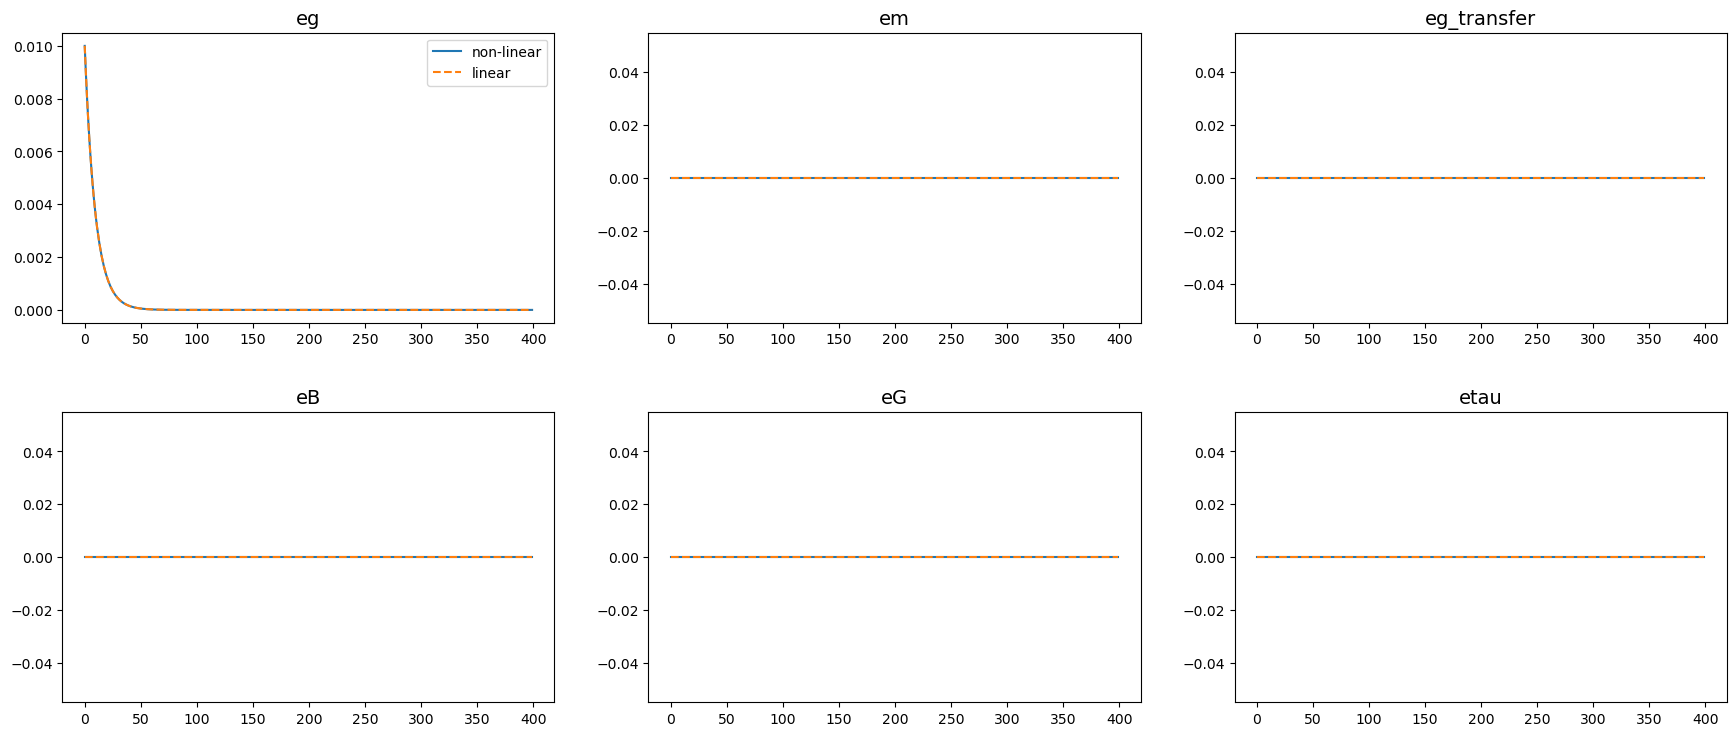


### varnames ###


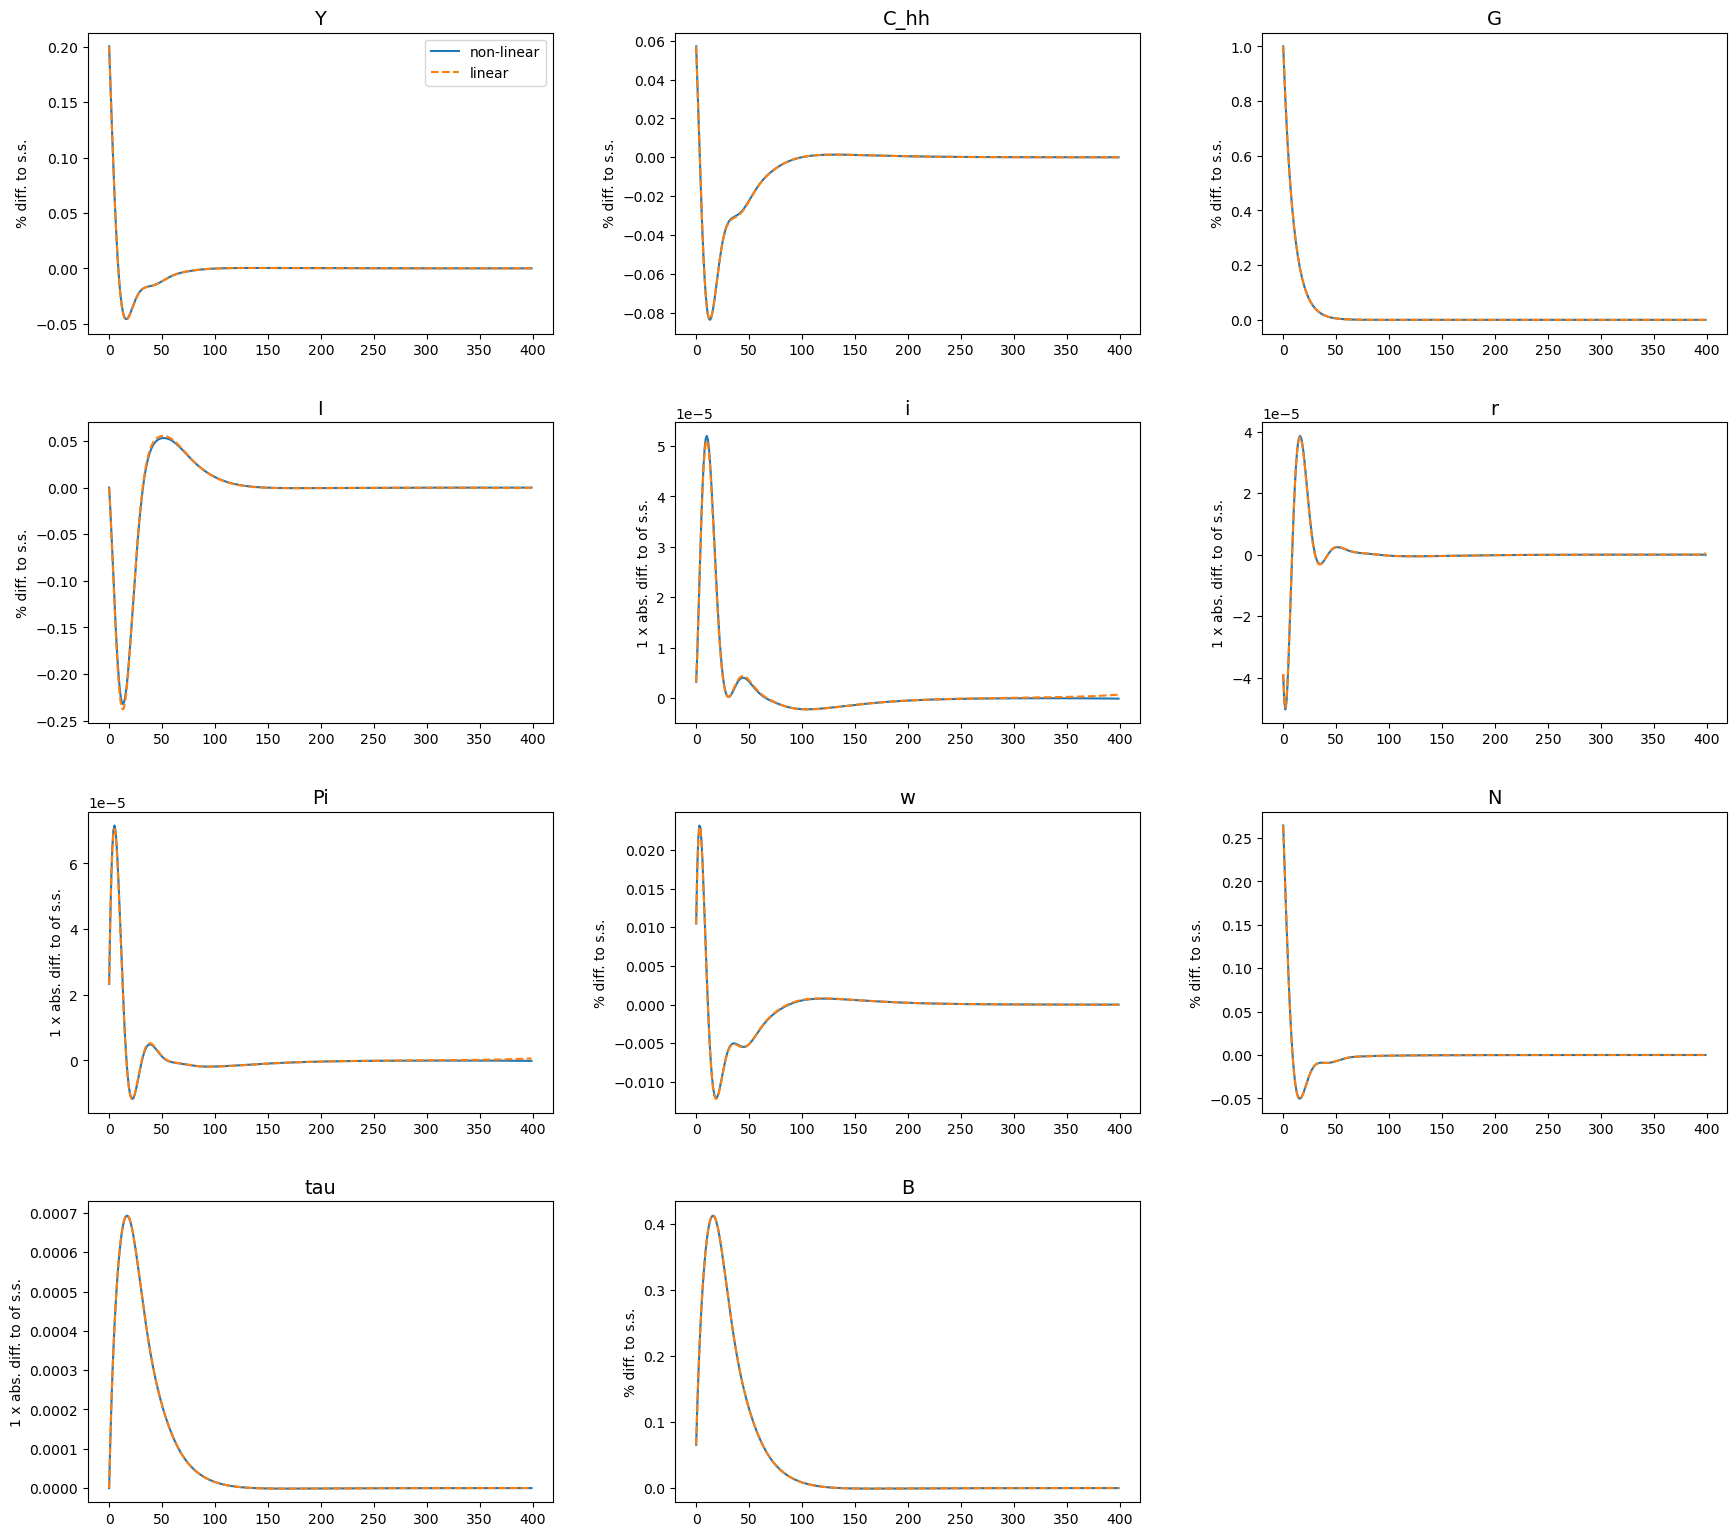


### tagets ###


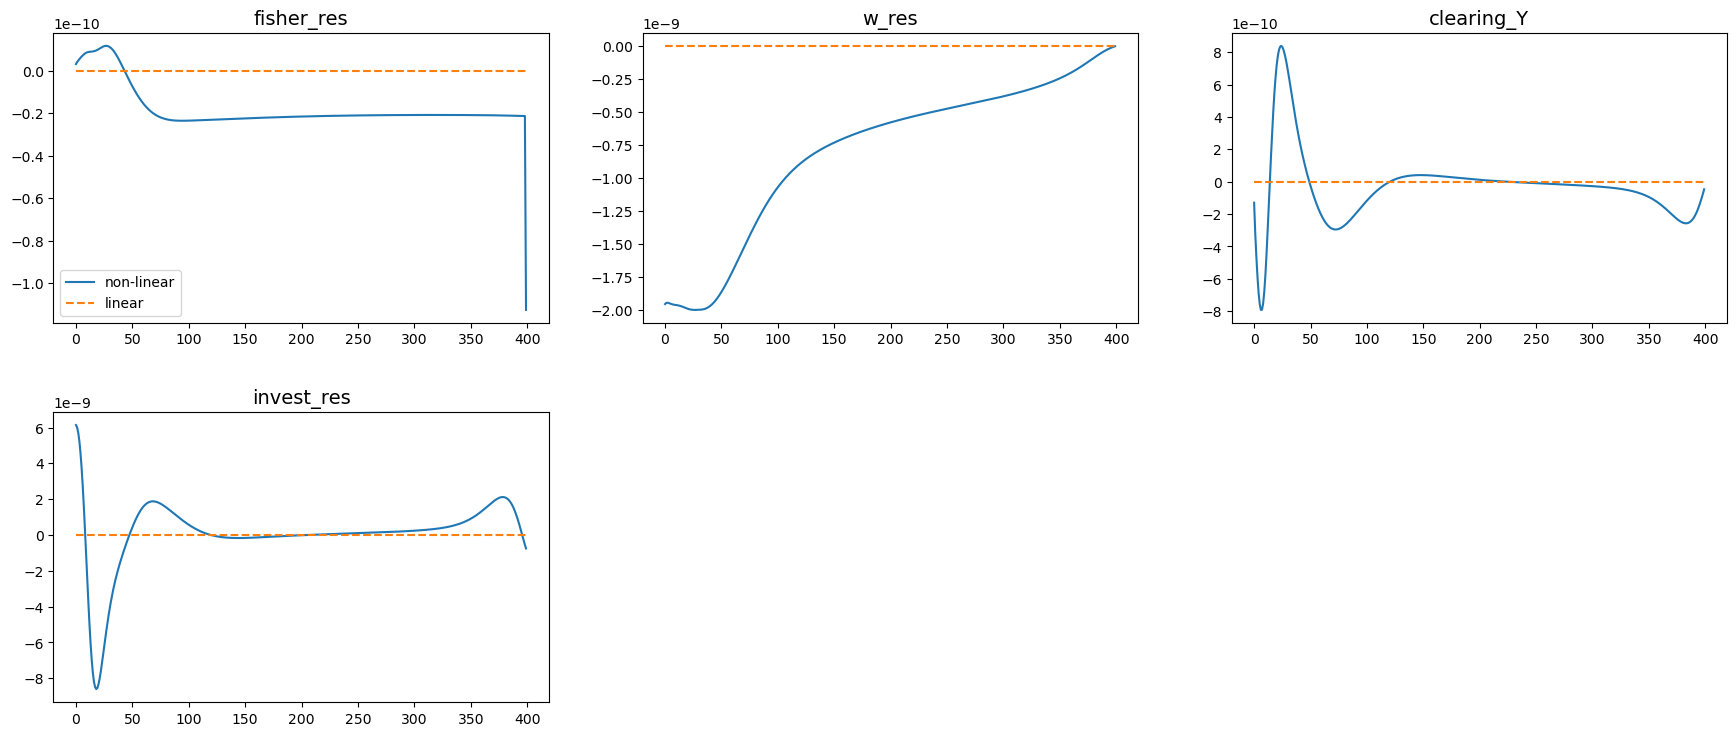

In [20]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'w', 'N', 'tau', 'B']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'ez', 'em', 'eg_transfer', 'd_tau', 'd_B', 'd_G','eB','etau','eG']
abs_diff = ['tau',  'r', 'Pi', 'i', 'rk']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=True)

In [21]:
model.path.A_hh + model.path.L_hh - (model.path.p_eq+ model.path.qB)

array([[-1.09560716e-09],
       [-1.42697232e-09],
       [-1.90817673e-09],
       [-2.52084220e-09],
       [-3.24033245e-09],
       [-4.03726652e-09],
       [-4.87861485e-09],
       [-5.72887160e-09],
       [-6.55157351e-09],
       [-7.31197325e-09],
       [-7.97862931e-09],
       [-8.52488746e-09],
       [-8.93290597e-09],
       [-9.19126109e-09],
       [-9.29521882e-09],
       [-9.24689303e-09],
       [-9.05398601e-09],
       [-8.72864092e-09],
       [-8.28619662e-09],
       [-7.74396369e-09],
       [-7.12016934e-09],
       [-6.43301590e-09],
       [-5.69995073e-09],
       [-4.93706409e-09],
       [-4.15873735e-09],
       [-3.37743344e-09],
       [-2.60359023e-09],
       [-1.84573423e-09],
       [-1.10884102e-09],
       [-3.98818756e-10],
       [ 2.79939627e-10],
       [ 9.24316623e-10],
       [ 1.53227120e-09],
       [ 2.10261675e-09],
       [ 2.63490563e-09],
       [ 3.12937232e-09],
       [ 3.58669006e-09],
       [ 4.00784472e-09],
       [ 4.3

In [196]:
# model.name = 'test'
# model.save()

In [75]:
IRF_full = deepcopy(model.IRF)
# path_full = model.path.__dict__.copy()

In [76]:
model.blocks = [
            'blocks.production_firm',
            'blocks.price_setters',
            'blocks.mutual_fund',
            'blocks.government_custom',
            'hh',
            'blocks.union',
            'blocks.taylor',
            'blocks.invest_residual',
            'blocks.fisher',
            'blocks.real_wage',
            'blocks.market_clearing']
# model.par.rho_m = 0.89
# model.par.phi_pi = 0.0
# model.par.phi_G = 1.0

In [77]:
# model.compute_jacs(do_print=True)
model._compute_jac(inputs='unknowns',do_print=True)
model._compute_jac(inputs='shocks',do_print=True)

full Jacobian to unknowns computed in 3.1 secs [in evaluate_blocks(): 1.6 secs]
full Jacobian to shocks computed in 3.5 secs [in evaluate_blocks(): 2.0 secs]


In [62]:
# model.find_IRFs(shocks=['eg'])

In [64]:
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)

In [32]:
# model.par.jump_eG = model.par.jump_eg * ss.G
# model.par.rho_eG = model.par.rho_eg
# model.find_IRFs(shocks=['eG'])
# paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)

In [78]:
dB = IRF_full['B']
dtau = IRF_full['tau']
dG = IRF_full['G']

In [79]:
model.find_IRFs(shocks={'deG': dG})
IRF_eG = deepcopy(model.IRF)

model.find_IRFs(shocks={'detau': dtau})
IRF_etau = deepcopy(model.IRF)

model.find_IRFs(shocks={'deB': dB})
IRF_eB = deepcopy(model.IRF)

In [86]:
IRF_eB['clearing_A']

array([-1.08486309e-03, -1.99595362e-03, -2.77043824e-03, -3.43508894e-03,
       -4.01129107e-03, -4.51566570e-03, -4.96071759e-03, -5.35545453e-03,
       -5.70600637e-03, -6.01622085e-03, -6.28821555e-03, -6.52287869e-03,
       -6.72031167e-03, -6.88020798e-03, -7.00216670e-03, -7.08594336e-03,
       -7.13163653e-03, -7.13981232e-03, -7.11157558e-03, -7.04859386e-03,
       -6.95308086e-03, -6.82774679e-03, -6.67572357e-03, -6.50047211e-03,
       -6.30567881e-03, -6.09514782e-03, -5.87269460e-03, -5.64204555e-03,
       -5.40674748e-03, -5.17008970e-03, -4.93504070e-03, -4.70420067e-03,
       -4.47977007e-03, -4.26353385e-03, -4.05686041e-03, -3.86071373e-03,
       -3.67567702e-03, -3.50198565e-03, -3.33956733e-03, -3.18808729e-03,
       -3.04699634e-03, -2.91557978e-03, -2.79300541e-03, -2.67836911e-03,
       -2.57073663e-03, -2.46918069e-03, -2.37281258e-03, -2.28080801e-03,
       -2.19242691e-03, -2.10702726e-03, -2.02407334e-03, -1.94313879e-03,
       -1.86390500e-03, -

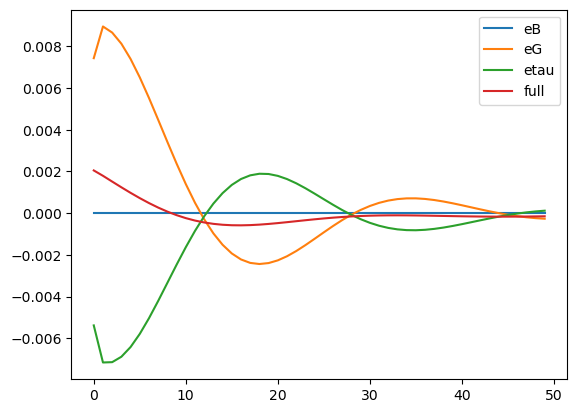

In [81]:
fig,ax = plt.subplots()
T_max = 50
ax.plot(np.arange(T_max), IRF_eB['Y'][:T_max], label='eB')
ax.plot(np.arange(T_max), IRF_eG['Y'][:T_max], label='eG')
ax.plot(np.arange(T_max), IRF_etau['Y'][:T_max], label='etau')
ax.plot(np.arange(T_max), IRF_full['Y'][:T_max], label='full')
ax.legend()

In [38]:
IRF_full['Y'] - (IRF_eG['Y'] + IRF_etau['Y'])

array([ 8.64249107e-08,  1.08997149e-07,  1.07284931e-07,  1.02731763e-07,
        9.58319789e-08,  8.71191396e-08,  7.71273021e-08,  6.63745332e-08,
        5.53407533e-08,  4.44547309e-08,  3.40842045e-08,  2.45293149e-08,
        1.60192661e-08,  8.71281723e-09,  2.70110829e-09, -1.98741127e-09,
       -5.37957392e-09, -7.54886351e-09, -8.60627477e-09, -8.69113965e-09,
       -7.96131246e-09, -6.58474871e-09, -4.73122184e-09, -2.56512078e-09,
       -2.39780689e-10,  2.10731730e-09,  4.35796850e-09,  6.41531991e-09,
        8.20484989e-09,  9.67441746e-09,  1.07932238e-08,  1.15502869e-08,
        1.19519818e-08,  1.20194353e-08,  1.17856125e-08,  1.12923098e-08,
        1.05872998e-08,  9.72116689e-09,  8.74517008e-09,  7.70877922e-09,
        6.65789563e-09,  5.63336697e-09,  4.66990322e-09,  3.79541742e-09,
        3.03087743e-09,  2.39018272e-09,  1.88057629e-09,  1.50314810e-09,
        1.25362020e-09,  1.12329856e-09,  1.09975274e-09,  1.16813143e-09,
        1.31188970e-09,  

### shocks ###


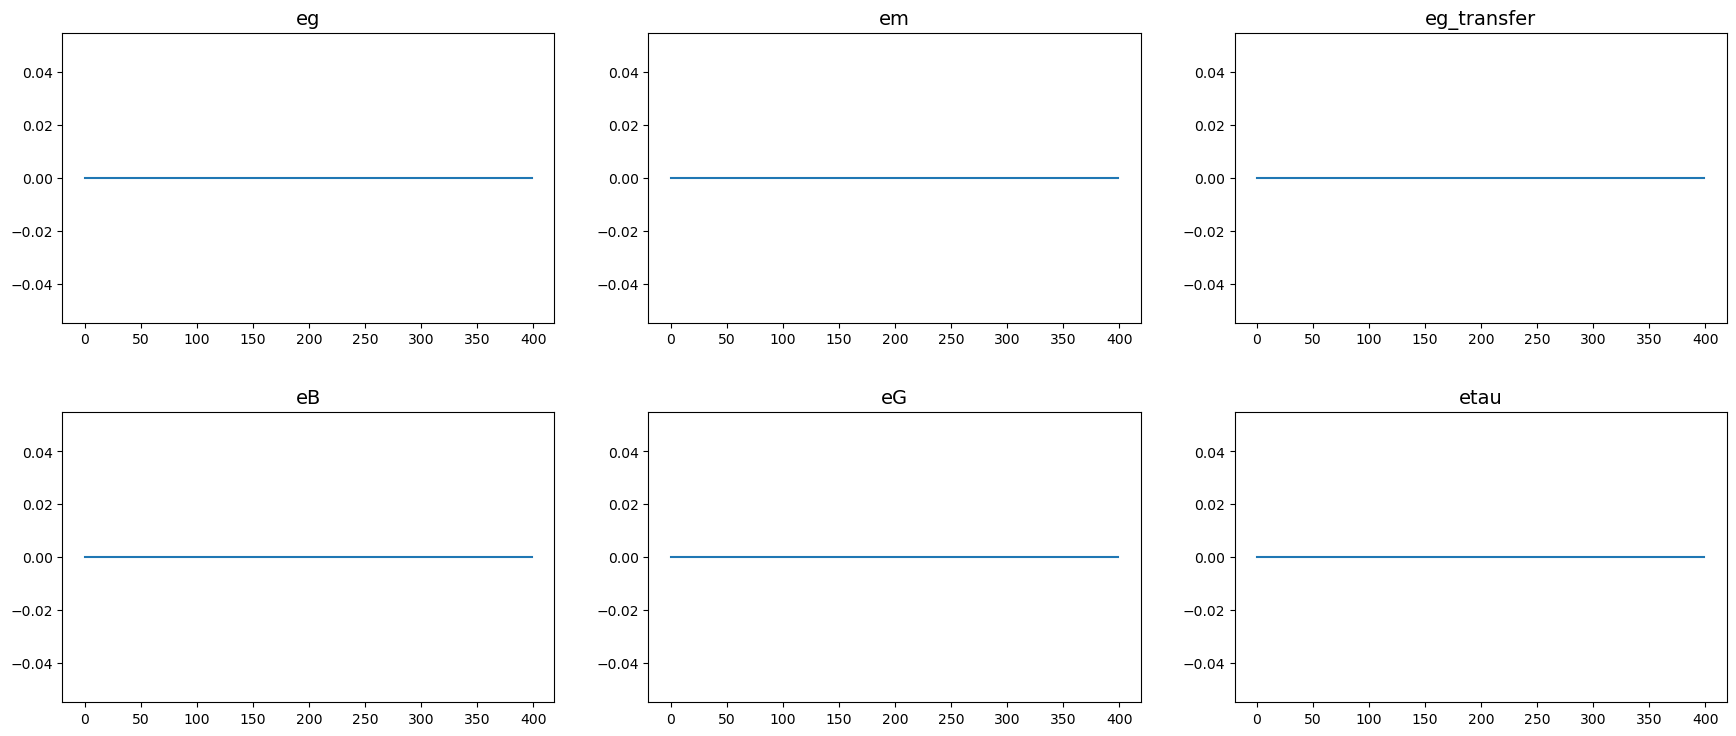


### varnames ###


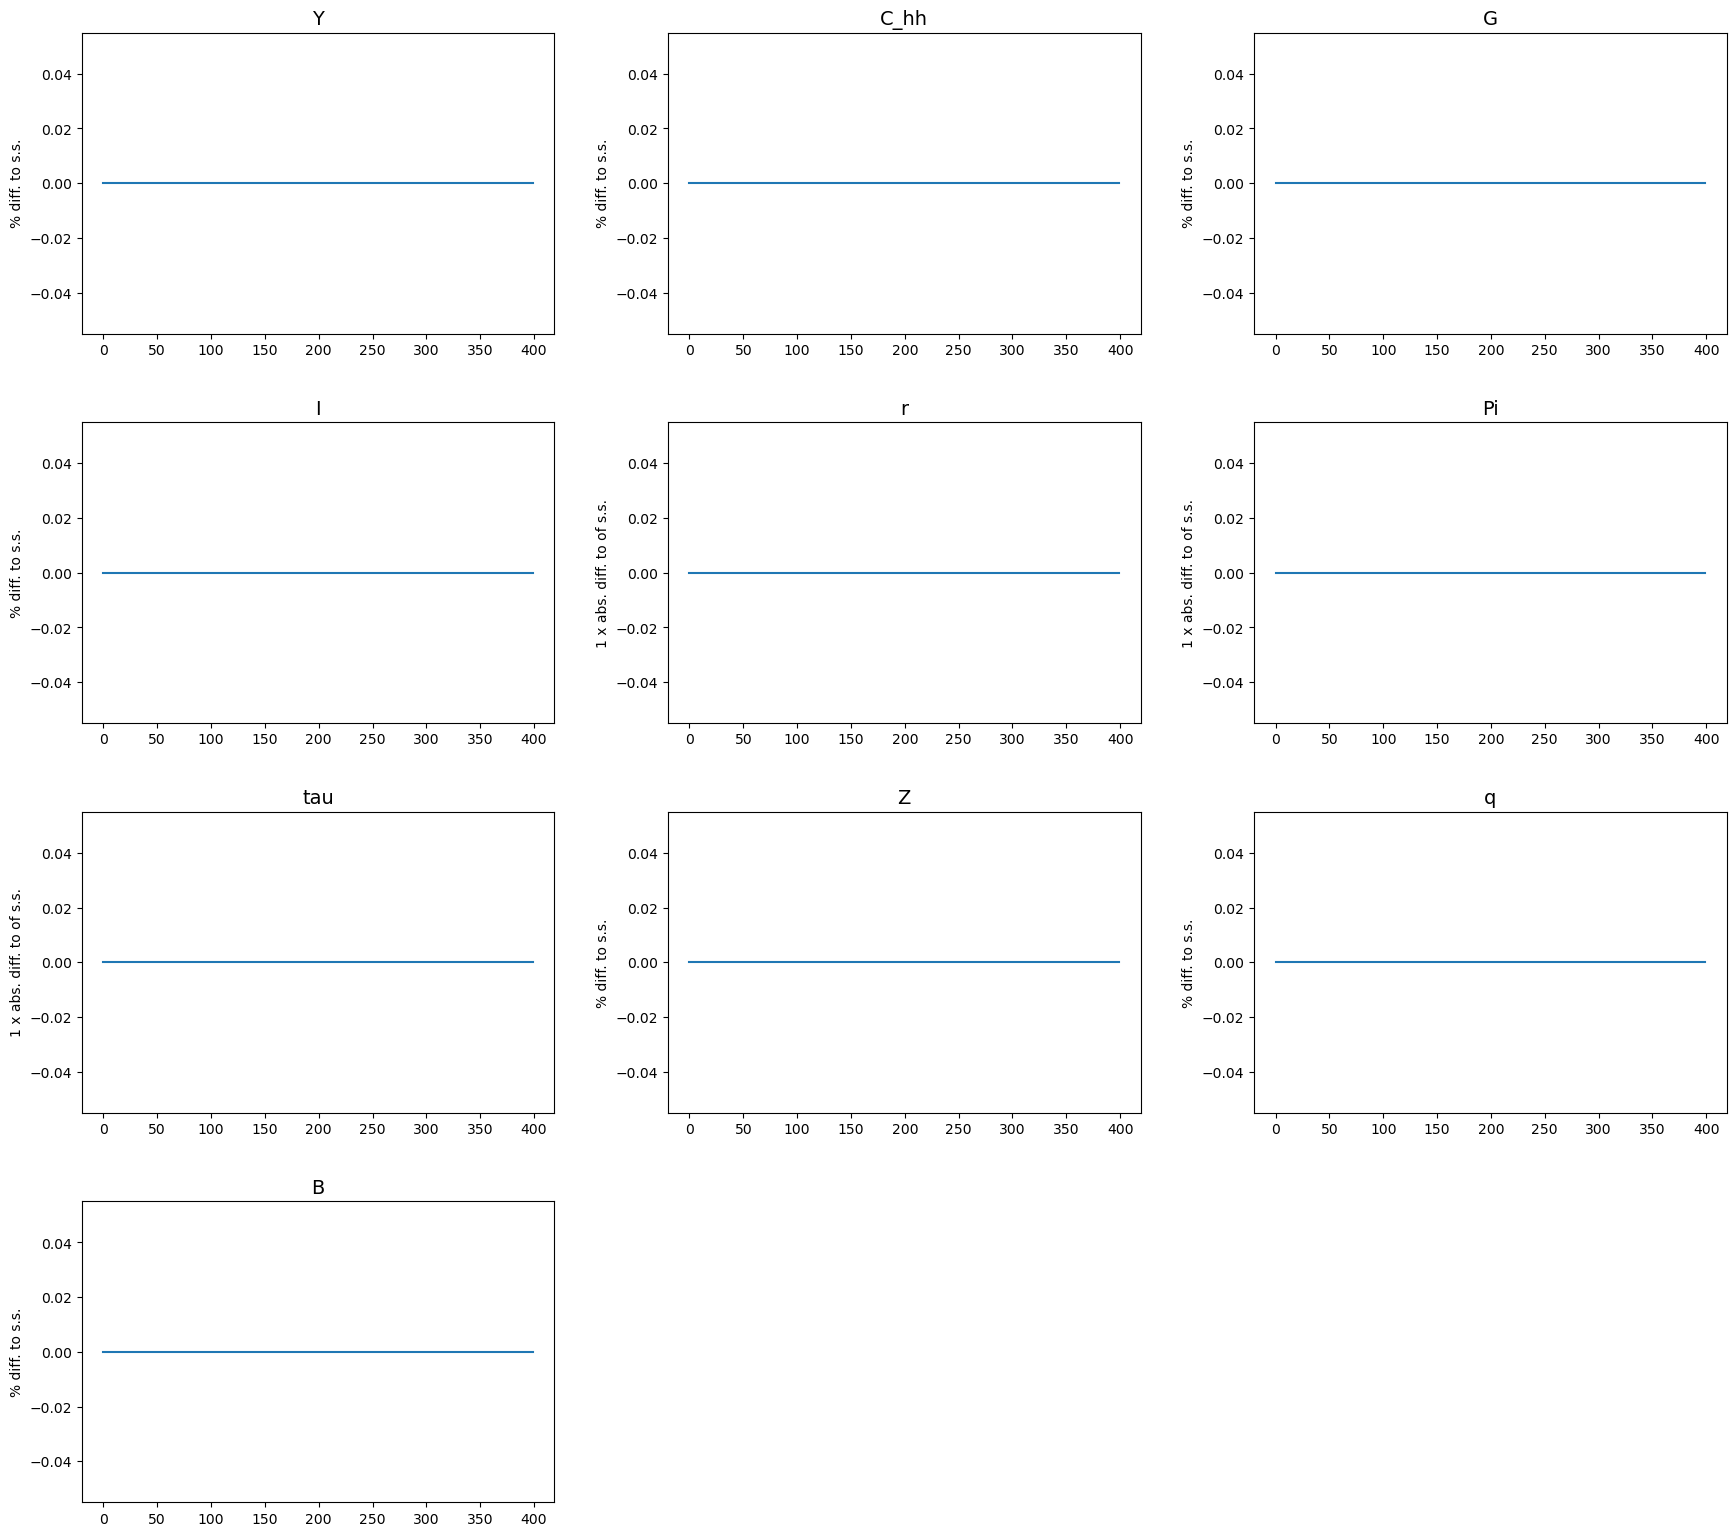


### tagets ###


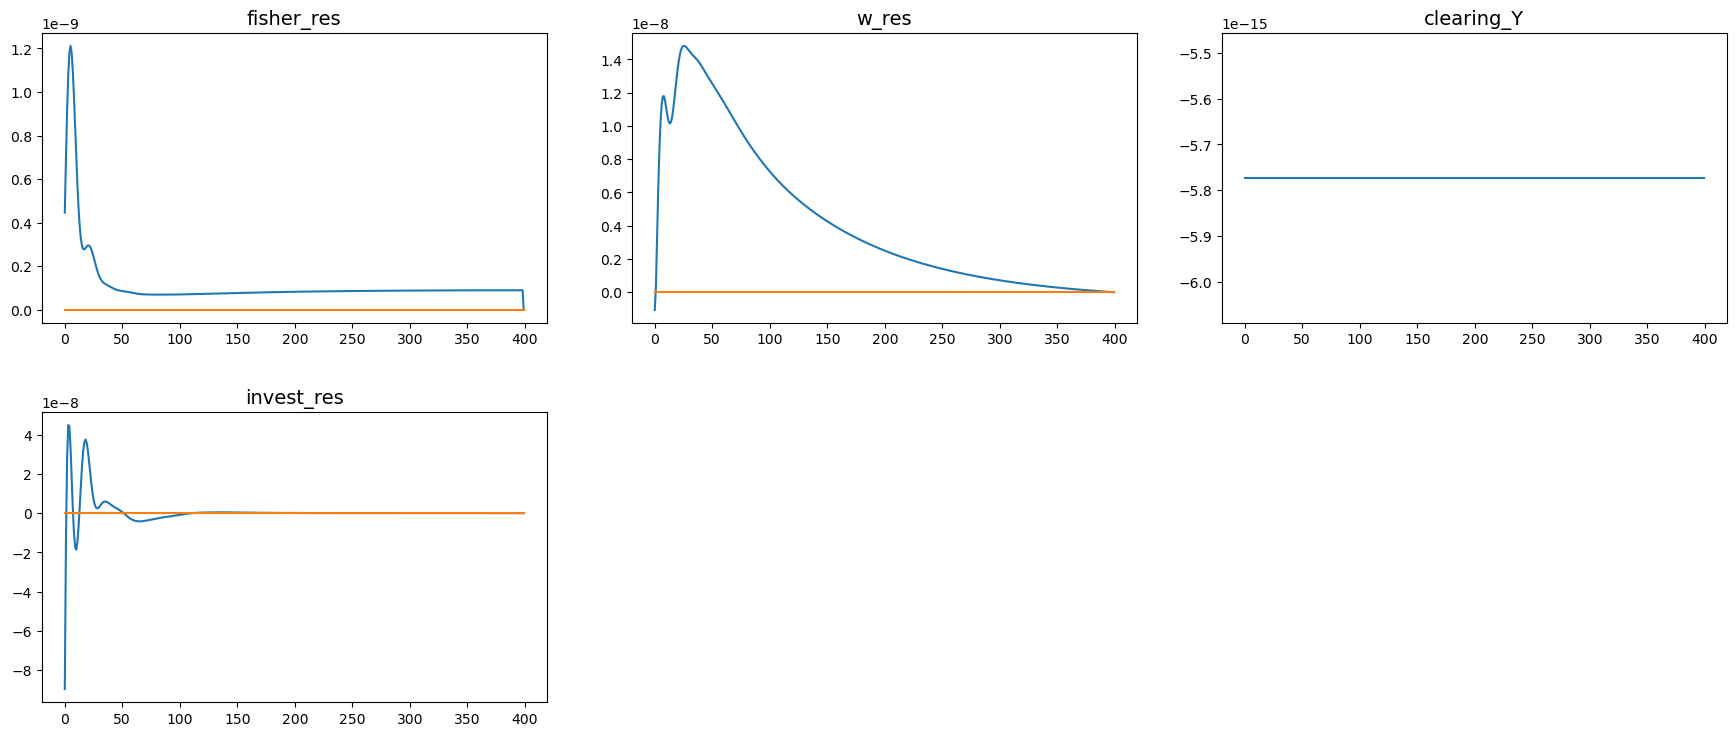

In [36]:
shock_dict = {
    # 'deG': dG,
    # 'detau': dtau,
    'deB': dB
}
model.find_IRFs(shocks=shock_dict)
paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)

In [204]:
# zero = []
# non_zero = []
# for key, value in model.jac.items():
#     if np.all(value == 0.0):
#         zero.append(key)
#     else:
#         non_zero.append(key)
# print(f'zero: {zero}')
# print('')
# print(f'non zero: {non_zero}')

In [205]:
# shock_dict = {
#     # 'deG': dG,
#     'detau': dtau,
#     # 'deB': dB
# }
# model.find_IRFs(shocks=shock_dict)
# # paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
# # model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)
# # model
# IRF_tau = model.IRF

In [206]:
# print(model.unknowns)
# print(model.shocks)
# test_jacs = deepcopy(model.jac)
# for i_shock,shockname in enumerate(model.shocks):
#     for i_unknown, unknownname in enumerate(model.unknowns):
#         test_jacs[(unknownname, shockname)] = model.G_U[i_unknown*par.T:(i_unknown+1)*par.T,
#                                               i_shock*par.T:(i_shock+1)*par.T]

# Misc

In [207]:
# model2 = HANKStickyModelClass(name='baseline')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value
# model.ss.__dict__['Kd'] = model.ss.__dict__['K']
# model.ss.__dict__['clearing_K'] = model.ss.__dict__['clearing_Y']

In [208]:
# model.print_unpack_varlist()

In [209]:
# model.check_non_lin(0)

In [210]:
# print(np.max(path.A - path.A_hh))